In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import base64
import io

def generate_chart(chart_response, chart_type):
    if chart_type == 'pie':
        chart_data_for_pie = chart_response['data_needed']
        chart_categories_pie = chart_data_for_pie['categories']
        chart_values_pie = chart_data_for_pie['values']
        chart_label = chart_response["chart_label"]
        # Sample data for pie chart (replace this with your actual data)
        departments = chart_categories_pie
        employee_count = chart_values_pie

        # Set style and color palette
        sns.set(style="whitegrid")
        sns.set_palette("bright")
    
        # Create a pie chart using Seaborn
        plt.figure(figsize=(8, 8))
        plt.title(chart_label, fontsize=16)
        plt.pie(employee_count, labels=departments, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    elif chart_type == 'bar':
        chart_data_for_bar = chart_response['data_needed']
        chart_categories_bar = chart_data_for_bar['x-axis']['categories']
        chart_values_bar = chart_data_for_bar['y-axis']['values']
        chart_label = chart_response["chart_label"]
        x_label = chart_response["axis_labels"]["x"]
        y_label = chart_response["axis_labels"]["y"]

        # Sample data for bar chart (replace this with your actual data)
        employee = chart_categories_bar
        days_used = chart_values_bar

        # Set style and color palette
        sns.set(style="whitegrid")
        sns.set_palette("colorblind")

        # Create bar chart using Seaborn
        plt.figure(figsize=(10, 6))
        sns.barplot(x=employee, y=days_used, color='blue', label='Days Used')

        # Add labels and title
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.title(chart_label, fontsize=16)
        plt.legend()

    elif chart_type == 'matrix':
        attributes = chart_response["data_needed"]["attributes"]
        values = chart_response["data_needed"]["values"]
        chart_label = chart_response["chart_label"]
        

        # Data
        column1 =  attributes
        column2 =values
        # Determine the maximum length of the columns
        max_length = max(len(column1), len(column2))

        # Pad the shorter list with empty strings to ensure consistency
        column1 += [''] * (max_length - len(column1))
        column2 += [''] * (max_length - len(column2))

        # Create a matrix-like visualization using matplotlib's table function
        data_matrix = [
            column1,
            column2
        ]

        # Transpose the data matrix
        data_matrix_transposed = list(map(list, zip(*data_matrix)))

        # Create a subplot
        fig, ax = plt.subplots(figsize=(10, 6))

        # Create a table using matplotlib's table function
        table = ax.table(cellText=data_matrix_transposed, loc='center', cellLoc='center')

        # Modify font size and cell padding for better readability
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.2, 1.2)
        for key, cell in table._cells.items():
            cell.set_text_props(fontsize=10)
            cell.set_edgecolor('black')

        # Hide axes
        ax.axis('off')

        # Adjust layout
        plt.tight_layout()

        # Show the matrix chart
        # plt.show()


    else:
        return "Invalid chart type"

    # Convert the chart to an image
    buffer = io.BytesIO()
    plt.savefig(buffer, format='png')
    buffer.seek(0)
    image_data = base64.b64encode(buffer.getvalue()).decode('utf-8')

    # Close the plot to avoid warnings
    plt.close()

    return image_data


In [81]:
# Sample data for testing
chart_response_pie = {
    "data_needed": {
        "categories": ["A", "B", "C", "D"],
        "values": [25, 30, 35, 10]
    },
    "chart_label": "Pie Chart"
}

# Test pie chart
pie_image_data = generate_chart(chart_response_pie, 'pie')

with open("pie_chart.png", "wb") as img_file:
    img_file.write(base64.b64decode(pie_image_data))

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import base64
import io

def generate_chart(chart_response, chart_type):
    if chart_type == 'pie':
        chart_data_for_pie = chart_response['data_needed']
        chart_categories_pie = chart_data_for_pie['categories']
        chart_values_pie = chart_data_for_pie['values']
        chart_label = chart_response["chart_label"]
        # Sample data for pie chart (replace this with your actual data)
        departments = chart_categories_pie
        employee_count = chart_values_pie

        # Set style and color palette
        sns.set(style="whitegrid")
        sns.set_palette(['#6B9080','#A4C3B2','#CCE3DE','#EAF4F4'])
        # colors = ['#212529','#343A40','#495057','#6C757D']  # Define your colors here
    
        # Create a pie chart using Seaborn
        plt.figure(figsize=(8, 8))
        plt.title(chart_label, fontsize=16)
        plt.pie(employee_count, labels=departments, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    elif chart_type == 'bar':
        chart_data_for_bar = chart_response['data_needed']
        chart_categories_bar = chart_data_for_bar['x-axis']['categories']
        chart_values_bar = chart_data_for_bar['y-axis']['values']
        chart_label = chart_response["chart_label"]
        x_label = chart_response["axis_labels"]["x"]
        y_label = chart_response["axis_labels"]["y"]

        # Sample data for bar chart (replace this with your actual data)
        employee = chart_categories_bar
        days_used = chart_values_bar

        # Set style and color palette
        sns.set(style="whitegrid")
        colors = ['#6B9080','#A4C3B2','#CCE3DE','#EAF4F4']  # Define your colors here

        # Create bar chart using Seaborn
        plt.figure(figsize=(10, 6))
        sns.barplot(x=employee, y=days_used, palette=colors, width=0.5)

        # Add labels and title
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.title(chart_label, fontsize=16)

    elif chart_type == 'matrix':
        attributes = chart_response["data_needed"]["attributes"]
        values = chart_response["data_needed"]["values"]
        chart_label = chart_response["chart_label"]
        
        # Data
        column1 =  attributes
        column2 =values
        # Determine the maximum length of the columns
        max_length = max(len(column1), len(column2))

        # Pad the shorter list with empty strings to ensure consistency
        column1 += [''] * (max_length - len(column1))
        column2 += [''] * (max_length - len(column2))

        # Create a matrix-like visualization using matplotlib's table function
        data_matrix = [
            column1,
            column2
        ]

        # Transpose the data matrix
        data_matrix_transposed = list(map(list, zip(*data_matrix)))

        # Create a subplot
        fig, ax = plt.subplots(figsize=(10, 6))

        # Create a table using matplotlib's table function
        table = ax.table(cellText=data_matrix_transposed, loc='center', cellLoc='center')

        # Modify font size and cell padding for better readability
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.2, 1.2)
        for key, cell in table._cells.items():
            cell.set_text_props(fontsize=10)
            cell.set_edgecolor('black')

        # Hide axes
        ax.axis('off')

        # Adjust layout
        plt.tight_layout()

        # Show the matrix chart
        # plt.show()


    else:
        return "Invalid chart type"

    # Convert the chart to an image
    buffer = io.BytesIO()
    plt.savefig(buffer, format='png')
    buffer.seek(0)
    image_data = base64.b64encode(buffer.getvalue()).decode('utf-8')

    # Close the plot to avoid warnings
    plt.close()

    return image_data

# Sample data for testing
chart_response_bar = {
    "data_needed": {
        "x-axis": {
            "categories": ["John", "Alice", "Bob", "Dylan"]
        },
        "y-axis": {
            "values": [5, 10, 15, 20]
        }
    },
    "chart_label": "Bar Chart",
    "axis_labels": {
        "x": "Employee",
        "y": "Days Used"
    }
}

# Test bar chart
bar_image_data = generate_chart(chart_response_bar, 'bar')

with open("bar_chart.png", "wb") as img_file:
    img_file.write(base64.b64decode(bar_image_data))

C:\Users\User\AppData\Local\Temp\ipykernel_8600\1950558519.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=employee, y=days_used, palette=colors, width=0.5)


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import base64
import io

def generate_chart(chart_response, chart_type):
    if chart_type == 'pie':
        chart_data_for_pie = chart_response['data_needed']
        chart_categories_pie = chart_data_for_pie['categories']
        chart_values_pie = chart_data_for_pie['values']
        chart_label = chart_response["chart_label"]
        # Sample data for pie chart (replace this with your actual data)
        departments = chart_categories_pie
        employee_count = chart_values_pie

        # Set style and color palette
        sns.set(style="whitegrid")
        sns.set_palette(["#6C757D"])
    
        # Create a pie chart using Seaborn
        plt.figure(figsize=(8, 8))
        plt.title(chart_label, fontsize=16)
        plt.pie(employee_count, labels=departments, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    elif chart_type == 'bar':
        chart_data_for_bar = chart_response['data_needed']
        chart_categories_bar = chart_data_for_bar['x-axis']['categories']
        chart_values_bar = chart_data_for_bar['y-axis']['values']
        chart_label = chart_response["chart_label"]
        x_label = chart_response["axis_labels"]["x"]
        y_label = chart_response["axis_labels"]["y"]

        # Sample data for bar chart (replace this with your actual data)
        employee = chart_categories_bar
        days_used = chart_values_bar

        # Set style and color palette
        sns.set(style="whitegrid")
        sns.set_palette(["#6C757D"])

        # Create bar chart using Seaborn
        plt.figure(figsize=(10, 6))
        sns.barplot(x=employee, y=days_used, color='#6C757D', label='Days Used')

        # Add labels and title
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.title(chart_label, fontsize=16)
        plt.legend()

    elif chart_type == 'matrix':
        attributes = chart_response["data_needed"]["attributes"]
        values = chart_response["data_needed"]["values"]
        chart_label = chart_response["chart_label"]
        

        # Data
        column1 =  attributes
        column2 =values
        # Determine the maximum length of the columns
        max_length = max(len(column1), len(column2))

        # Pad the shorter list with empty strings to ensure consistency
        column1 += [''] * (max_length - len(column1))
        column2 += [''] * (max_length - len(column2))

        # Create a matrix-like visualization using matplotlib's table function
        data_matrix = [
            column1,
            column2
        ]

        # Transpose the data matrix
        data_matrix_transposed = list(map(list, zip(*data_matrix)))

        # Create a subplot
        fig, ax = plt.subplots(figsize=(10, 6))

        # Create a table using matplotlib's table function
        table = ax.table(cellText=data_matrix_transposed, loc='center', cellLoc='center')

        # Modify font size and cell padding for better readability
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.2, 1.2)
        for key, cell in table._cells.items():
            cell.set_text_props(fontsize=10)
            cell.set_edgecolor('black')

        # Hide axes
        ax.axis('off')

        # Adjust layout
        plt.tight_layout()

        # Show the matrix chart
        # plt.show()


    else:
        return "Invalid chart type"

    # Convert the chart to an image
    buffer = io.BytesIO()
    plt.savefig(buffer, format='png')
    buffer.seek(0)
    image_data = base64.b64encode(buffer.getvalue()).decode('utf-8')

    # Close the plot to avoid warnings
    plt.close()

    return image_data


In [25]:
# Sample data for testing
chart_response_pie = {
    "data_needed": {
        "categories": ["A", "B", "C", "D"],
        "values": [25, 30, 35, 10]
    },
    "chart_label": "Pie Chart"
}

# Test pie chart
pie_image_data = generate_chart(chart_response_pie, 'pie')
with open("pie_chart.png", "wb") as img_file:
    img_file.write(base64.b64decode(pie_image_data))

# Dark Colours

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import base64
import io

def generate_chart(chart_response, chart_type):
    if chart_type == 'pie':
        chart_data_for_pie = chart_response['data_needed']
        chart_categories_pie = chart_data_for_pie['categories']
        chart_values_pie = chart_data_for_pie['values']
        chart_label = chart_response["chart_label"]
        # Sample data for pie chart (replace this with your actual data)
        departments = chart_categories_pie
        employee_count = chart_values_pie

        # Set style and color palette
        sns.set(style="whitegrid")
        sns.set_palette("dark")

        # Create a pie chart using Seaborn
        plt.figure(figsize=(8, 8))
        plt.title(chart_label, fontsize=16)
        plt.pie(employee_count, labels=departments, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    elif chart_type == 'bar':
        chart_data_for_bar = chart_response['data_needed']
        chart_categories_bar = chart_data_for_bar['x-axis']['categories']
        chart_values_bar = chart_data_for_bar['y-axis']['values']
        chart_label = chart_response["chart_label"]
        x_label = chart_response["axis_labels"]["x"]
        y_label = chart_response["axis_labels"]["y"]

        # Sample data for bar chart (replace this with your actual data)
        employee = chart_categories_bar
        days_used = chart_values_bar

        # Set style and color palette
        sns.set(style="whitegrid")
        sns.set_palette("dark")

        # Create bar chart using Seaborn
        plt.figure(figsize=(10, 6))
        sns.barplot(x=employee, y=days_used)

        # Add labels and title
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.title(chart_label, fontsize=16)

    elif chart_type == 'matrix':
        attributes = chart_response["data_needed"]["attributes"]
        values = chart_response["data_needed"]["values"]
        chart_label = chart_response["chart_label"]

        # Data
        column1 =  attributes
        column2 =values
        # Determine the maximum length of the columns
        max_length = max(len(column1), len(column2))

        # Pad the shorter list with empty strings to ensure consistency
        column1 += [''] * (max_length - len(column1))
        column2 += [''] * (max_length - len(column2))

        # Create a matrix-like visualization using matplotlib's table function
        data_matrix = [
            column1,
            column2
        ]

        # Transpose the data matrix
        data_matrix_transposed = list(map(list, zip(*data_matrix)))

        # Create a subplot
        fig, ax = plt.subplots(figsize=(10, 6))

        # Create a table using matplotlib's table function
        table = ax.table(cellText=data_matrix_transposed, loc='center', cellLoc='center')

        # Modify font size and cell padding for better readability
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.2, 1.2)
        for key, cell in table._cells.items():
            cell.set_text_props(fontsize=10)
            cell.set_edgecolor('black')

        # Hide axes
        ax.axis('off')

        # Adjust layout
        plt.tight_layout()

    else:
        return "Invalid chart type"

    # Convert the chart to an image
    buffer = io.BytesIO()
    plt.savefig(buffer, format='png')
    buffer.seek(0)
    image_data = base64.b64encode(buffer.getvalue()).decode('utf-8')

    # Close the plot to avoid warnings
    plt.close()

    return image_data


In [27]:
# Sample data for testing
chart_response_pie = {
    "data_needed": {
        "categories": ["A", "B", "C", "D"],
        "values": [25, 30, 35, 10]
    },
    "chart_label": "Sample Pie Chart"
}

# Test pie chart
pie_image_data = generate_chart(chart_response_pie, 'pie')
with open("pie_chart.png", "wb") as img_file:
    img_file.write(base64.b64decode(pie_image_data))

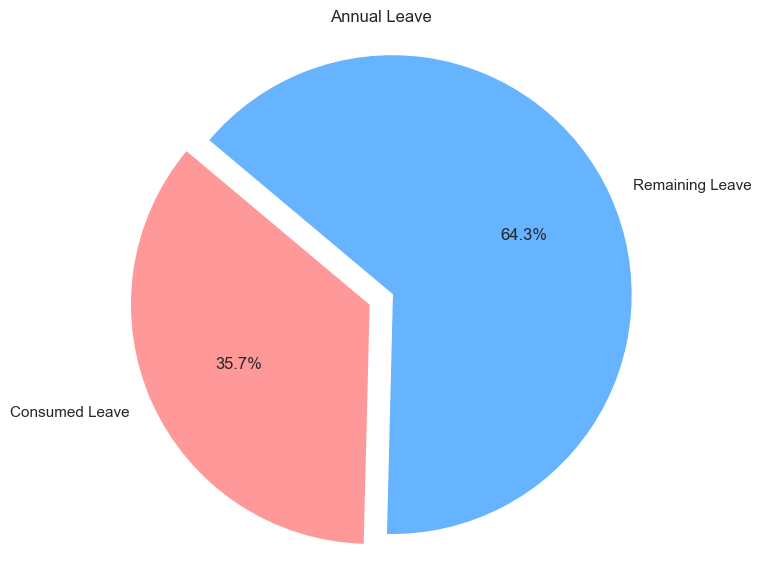

In [74]:
import matplotlib.pyplot as plt

# Data
total_leave = 14
consumed_leave = 5
remaining_leave = total_leave - consumed_leave

# Plotting
labels = ['Consumed Leave', 'Remaining Leave']
sizes = [consumed_leave, remaining_leave]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)

plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Annual Leave')
plt.axis('equal')
plt.show()
